In [23]:
#Import Dependencies
import pandas as pd
import os
import csv
import requests
import matplotlib.pyplot as plt
from config import api_key 
import json
import pprint
import kdtree
import random
import scipy.stats as sts
from sklearn import datasets

In [24]:
#Create connection for Open Weather Map 
#Identify location and URL logic for open weather map
url="http://api.openweathermap.org/data/2.5/weather?q="

#Create Request URLs and Variables
#city_name=""
key="&appid="+ api_key

#Obtain cities from PIP install 
_current_dir, _current_filename = os.path.split("C:\\Users\\porti\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>")
_world_cities_csv_path = os.path.join(_current_dir, 'worldcities.csv')
_world_cities_kdtree = kdtree.create(dimensions=2)
WORLD_CITIES_DICT = {}


In [25]:
print(url)

http://api.openweathermap.org/data/2.5/weather?q=


In [26]:
#Access Random City Data
with open(_world_cities_csv_path, 'r') as csv_file:
    cities = csv.reader(csv_file)
    # discard the headers
    cities.__next__()
    city_list=[]
    random_cities=[]
    for city in cities:
        city_coordinate_key = (float(city[2]), float(city[3]))
        _world_cities_kdtree.add(city_coordinate_key)
        city_list.append(city[1])
random_cities.append(random.choices(city_list,k=51))
random_cities

[['san pablo tacachico',
  'pokrovka',
  'lithgow',
  'nankana sahib',
  'fukuyama',
  'sao bento',
  'kelamangalam',
  'gangarampur',
  'manati',
  'pilna',
  'budrio',
  'cuscatancingo',
  'caningay',
  'kidsgrove',
  'matabao',
  'chinchina',
  'nigel',
  'la esperanza',
  'barela',
  'buenos aires',
  'souto da carpalhosa',
  'barbalha',
  'kandava',
  'puke',
  'bujanovac',
  'kamal',
  'audru',
  'kambarka',
  'clearfield',
  'bentonville',
  'tweed',
  'crossfield',
  'palmeiras de goias',
  'nyakahanga',
  'uri',
  'cheveresu mare',
  'isabang',
  'thisted',
  'sabak',
  'daliang',
  'cruz das almas',
  'belousovka',
  'mirassol',
  'glen ellyn',
  'san miguel',
  'rakocziujfalu',
  'komsomolskoye',
  'asaka',
  'affoltern',
  'west bromwich',
  'soest']]

In [32]:
#Build Open Weather Request URLs
response_list=[]
latitude=[]
temperature=[]
humidity=[]
cloudiness=[]
windspeed=[]
temp_north_hem=[]
temp_south_hem=[]
hum_north_hem=[]
hum_south_hem=[]
cloud_north_hem=[]
cloud_south_hem=[]
wind_north_hem=[]
wind_south_hem=[]
city_insight=[]
place=[]
place_location=[]
for city in random_cities:
    for cur_random_cities in random_cities:
        for city in cur_random_cities:
            city_data = requests.get(url+city+key).json()
            response_list.append(city_data)
            try:
                name=city_data["name"]
                lon=city_data["coord"]["lon"]
                lat=city_data["coord"]["lat"]
                humidity=city_data["main"]["humidity"]
                max_temp=city_data["main"]["temp_max"]
                windspeed=city_data["wind"]["speed"]
                cloudiness=city_data["clouds"]["all"]
                places=[name,lat,lon,humidity,max_temp,windspeed,cloudiness]
                coord=(lat,lon)
                place.append(places)
                place_location.append(coord)               
            except:
                pass

%store place
response_list

Stored 'place' (list)


[{'coord': {'lon': -89.34, 'lat': 13.98},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'stations',
  'main': {'temp': 298.65,
   'feels_like': 302.51,
   'temp_min': 298.15,
   'temp_max': 299.15,
   'pressure': 1015,
   'humidity': 78},
  'visibility': 10000,
  'wind': {'speed': 0.74, 'deg': 97},
  'clouds': {'all': 20},
  'dt': 1598205446,
  'sys': {'type': 1,
   'id': 7209,
   'country': 'SV',
   'sunrise': 1598183115,
   'sunset': 1598228091},
  'timezone': -21600,
  'id': 3583429,
  'name': 'San Pablo Tacachico',
  'cod': 200},
 {'coord': {'lon': 78.01, 'lat': 42.34},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 289.55,
   'feels_like': 287.7,
   'temp_min': 289.55,
   'temp_max': 289.55,
   'pressure': 1012,
   'humidity': 44,
   'sea_level': 1012,
   'grnd_level': 826},
  'visibility': 10000,
  'wind': {'speed': 0.79, 

In [33]:
%store place_location

Stored 'place_location' (list)


In [34]:
response_list_df=pd.DataFrame(response_list)
response_list_df.to_csv("random_city_list.csv")

In [30]:
try:
    for town in response_list:
        latitude.append(town["coord"]["lat"])
        temperature.append(town["main"]["temp"])
        cloudiness.append(town["clouds"]["all"])
        windspeed.append(town["wind"]["speed"])
        humidity.append(town["main"]["humidity"])
except:
    pass

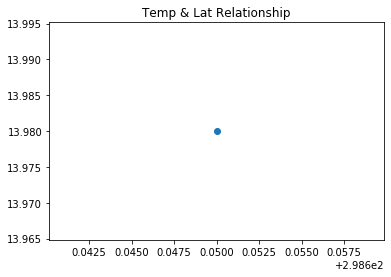

In [31]:
plt.scatter(temperature,latitude)
slope, intercept, r_value, p_value, std_err = sts.linregress(temperature,latitude)
plt.title("Temp & Lat Relationship")
plt.savefig("temp_lat_relationship.png")
#The plot below represents the relationship between temperature and latitude.

In [10]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,temperature)
#Linear Regression Valuues
for temp in response_list:
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere Temps
    if (temp["coord"]["lat"])>=0:
        temp_north_hem.append(temp["main"]["temp"])
    else:
        temp_south_hem.append(temp["main"]["temp"])
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyError: 'coord'

In [ ]:
plt.hist(temp_north_hem)
plt.savefig("temp_north_hem.png")

In [ ]:
plt.hist(temp_south_hem)
plt.savefig("temp_south_hem.png")
#There is an uneven distribution between the random points returned as points of refrence. The majority of reponses
#returned would be considered the northern hemisphere. 

TypeError: len() of unsized object

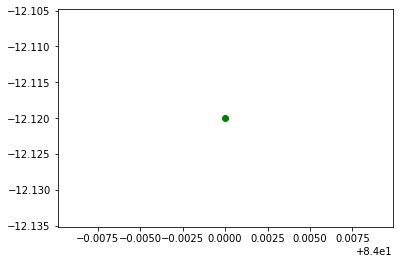

In [11]:
plt.scatter(humidity,latitude, color="green")
sts.linregress(humidity,latitude)
plt.title("Humidity & Lat Relationship")
plt.savefig("humidity_lat.png")
#The plot below represents the relationship between humidity and latitude.

In [12]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,humidity)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["main"]["humidity"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere humidity
    if (temp["coord"]["lat"])>=0:
        hum_north_hem.append(temp["main"]["humidity"])
    else:
        hum_south_hem.append(temp["main"]["humidity"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyError: 'coord'

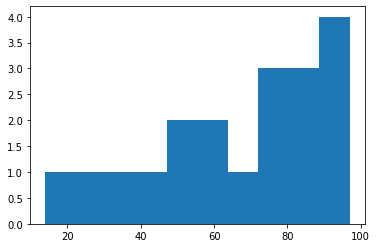

In [13]:
plt.hist(hum_north_hem)
plt.savefig("hum_north_hem.png")

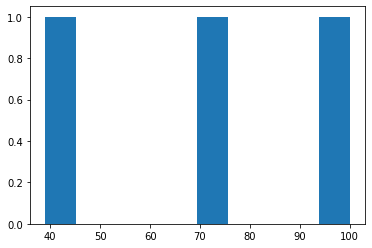

In [14]:
plt.hist(hum_south_hem)
plt.savefig("hum_south_hem.png")

TypeError: len() of unsized object

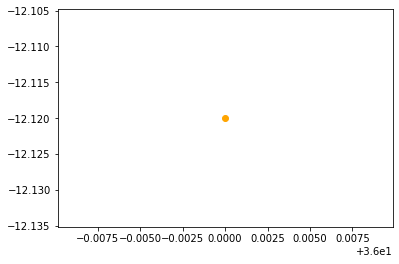

In [15]:
plt.scatter(cloudiness,latitude, color="orange")
sts.linregress(cloudiness,latitude)
plt.title("Cloudiness & Lat Relationship")
plt.savefig("cloud_lat.png")
#The plot below represents the relationship between cloudiness and latitude.

In [16]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,humidity)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["clouds"]["all"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere cloudiness
    if (temp["coord"]["lat"])>=0:
        cloud_north_hem.append(temp["clouds"]["all"])
    else:
        cloud_south_hem.append(temp["clouds"]["all"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyError: 'coord'

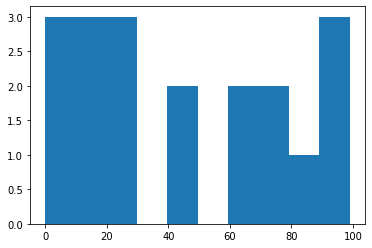

In [17]:
plt.hist(cloud_north_hem)
plt.savefig("cloud_north_hem.png")

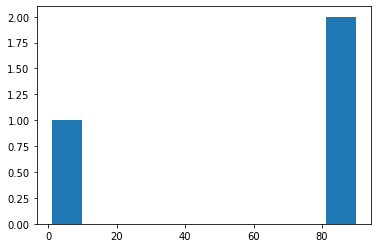

In [18]:
plt.hist(cloud_south_hem)
plt.savefig("cloud_south_hem.png")

TypeError: len() of unsized object

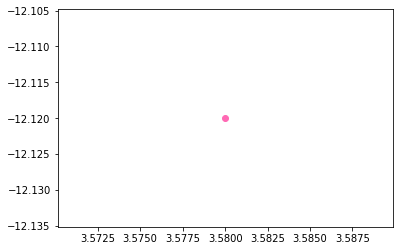

In [19]:
plt.scatter(windspeed,latitude, color="hotpink")
sts.linregress(windspeed,latitude)
plt.title("Wind & Lat Relationship")
plt.savefig("wind_lat.png")
#The plot below represents the relationship beteween windspeed and latitude.

In [20]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,humidity)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["wind"]["speed"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere Wind Speed
    if (temp["coord"]["lat"])>=0:
        wind_north_hem.append(temp["clouds"]["all"])
    else:
        wind_south_hem.append(temp["clouds"]["all"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyError: 'coord'

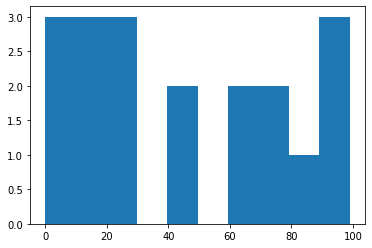

In [21]:
plt.hist(wind_north_hem)
plt.savefig("wind_north_hem.png")

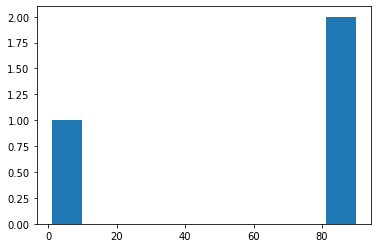

In [22]:
plt.hist(wind_south_hem)
plt.savefig("wind_south_hem.png")